In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import statsmodels.api as sm

%matplotlib inline


In [2]:
data = sm.datasets.fair.load_pandas().data

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                      4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. 
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

In [3]:
data.shape

(6366, 9)

In [4]:
 data['affair'] = (data.affairs>0).astype(int)

In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [6]:
data.children.value_counts()

0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64

In [7]:
data['children'] = data['children'].replace('5.5','5.0')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [9]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [10]:
data.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

Above code shows, the data set is highly imbalanced towards 0, meaning women not having affair

In [11]:
corr=data.corr()

In [12]:
import seaborn as sns

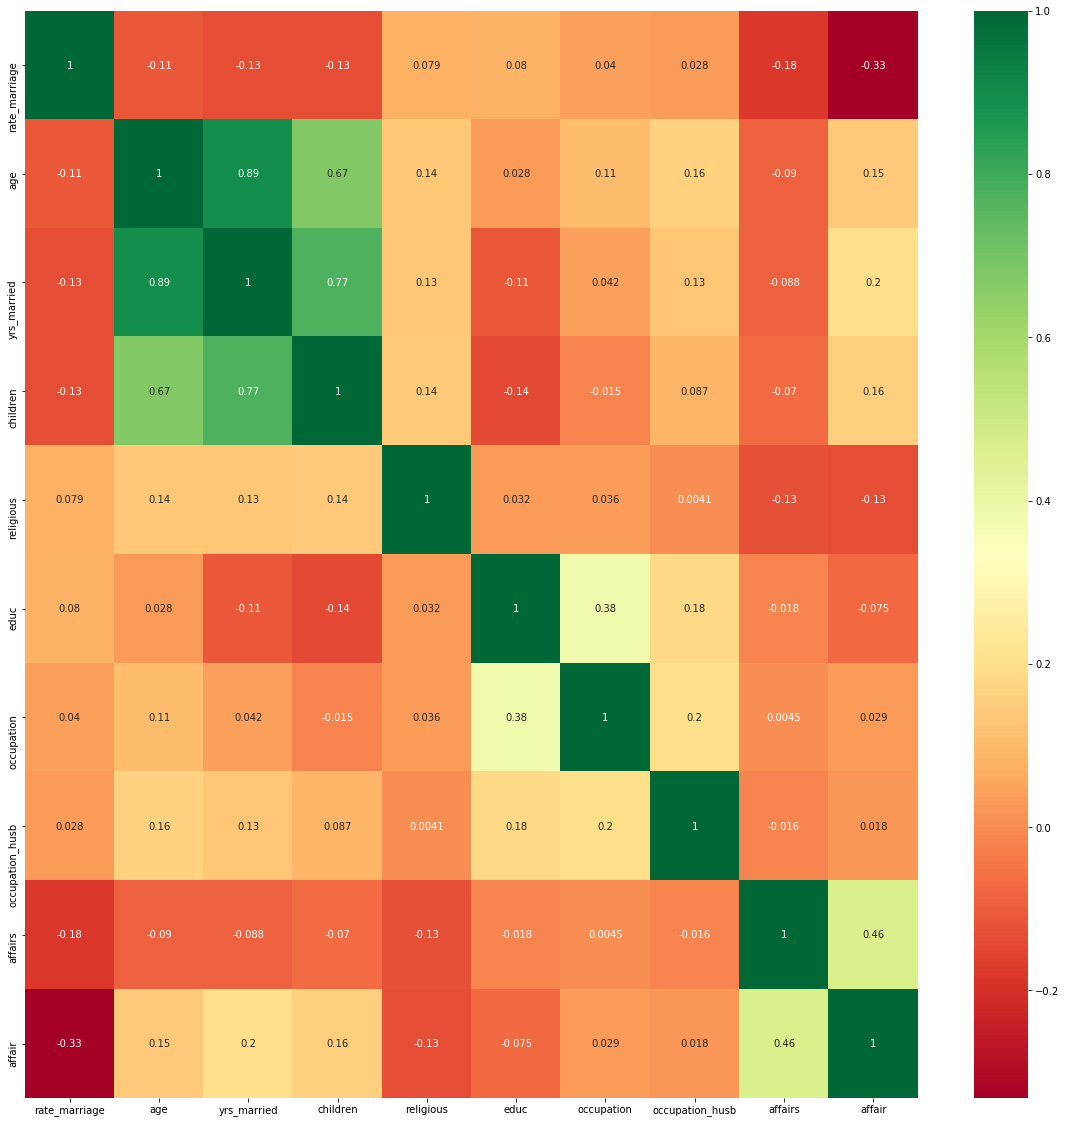

In [13]:
top_corr_features=corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

Observations from above heatmap :

1. rate_marriage - negatively correlated to target
2. age - less correlated to target variable, but highly correlated with yrs_married and children. Can be a valuable insigght for feature selection.


In [14]:
data.drop(['children','yrs_married'],axis=1,inplace=True)

### Treating imbalanced data

In [15]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [16]:
X.head()

,rate_marriage,age,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,1.0,14.0,3.0,4.0,4.666666


In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
os=RandomOverSampler()
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("Values before Oversampling :", Counter(y_train))
print("Values after Oversampling :", Counter(y_train_os))

Values before Oversampling : Counter({0: 3011, 1: 1445})
Values after Oversampling : Counter({0: 3011, 1: 3011})


In [19]:
from imblearn.combine import SMOTETomek
smote=SMOTETomek(0.5)
X_train_smote,y_train_smote=smote.fit_sample(X_train,y_train)
print("Values before SMOTE :", Counter(y_train))
print("Values after SMOTE :", Counter(y_train_smote))

Values before SMOTE : Counter({0: 3011, 1: 1445})
Values after SMOTE : Counter({0: 2897, 1: 1391})


### Models

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_predict=model.predict(X_test)

In [22]:
print("Accuracy without SMOTE : ",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))

Accuracy without SMOTE :  0.9696335078534032
[[1302    0]
 [  58  550]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1302
           1       1.00      0.90      0.95       608

    accuracy                           0.97      1910
   macro avg       0.98      0.95      0.96      1910
weighted avg       0.97      0.97      0.97      1910

0.9523026315789473


In [23]:
model.fit(X_train_os,y_train_os)
y_predict_os=model.predict(X_test)
print("Accuracy with oversampling : ",accuracy_score(y_test,y_predict_os))
print(confusion_matrix(y_test,y_predict_os))
print(classification_report(y_test,y_predict_os))

Accuracy with oversampling :  0.9790575916230366
[[1301    1]
 [  39  569]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1302
           1       1.00      0.94      0.97       608

    accuracy                           0.98      1910
   macro avg       0.98      0.97      0.98      1910
weighted avg       0.98      0.98      0.98      1910



In [24]:
model.fit(X_train_smote,y_train_smote)
y_predict_smote=model.predict(X_test)
print("Accuracy with smote : ",accuracy_score(y_test,y_predict_smote))
print(confusion_matrix(y_test,y_predict_smote))
print(classification_report(y_test,y_predict_smote))

Accuracy with smote :  0.9680628272251309
[[1301    1]
 [  60  548]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1302
           1       1.00      0.90      0.95       608

    accuracy                           0.97      1910
   macro avg       0.98      0.95      0.96      1910
weighted avg       0.97      0.97      0.97      1910

